# **Project Name**    - Yes Bank Stock Closing Price Preddiction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**  Sourabh Khamankar


# **Project Summary -**

**Project Overview:** Yes Bank is a prominent private sector bank in India. Since 2018, the bank has been in the news due to a major fraud case involving its founder, Rana Kapoor. This event led to a significant crash in the bank's stock price, making it a highly volatile asset. This project aims to analyze the impact of this event on the stock prices and build a Machine Learning model to predict the monthly closing price of the stock.

**Objective:** The primary objective is to use regression analysis to predict the stock's `Close` price. We have a dataset of monthly stock prices from the bank's inception, containing `Open`, `High`, `Low`, and `Close` prices. By analyzing trends, seasonality, and correlations, we aim to understand how the 2018 fraud case impacted the stock and whether predictive models can accurately forecast prices despite such volatility.

**Methodology:**

1. **Data Preprocessing:** We will convert the date column to a datetime object and handle any missing values.

2. **EDA:** We will visualize the stock's performance over time, specifically focusing on the pre-2018 growth and the post-2018 crash.

3. **Feature Engineering:** We will create lag features (previous month's price) and moving averages to help the model learn time-dependent patterns.

4. **Model Building:** We will implement Linear Regression, Ridge/Lasso Regression (to handle multicollinearity), and Random Forest to find the best fit.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**The Problem:** Stock price prediction is challenging due to the volatile nature of financial markets. For Yes Bank, this volatility is exacerbated by the 2018 fraud scandal, which caused a structural break in the stock's trend. The challenge is to build a regression model that can accurately predict the monthly `Close` price based on input features like `Open`, `High`, and `Low` prices, while accounting for the drastic shift in market behavior after 2018.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [127]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

# ML Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Dataset Loading

In [128]:
# Load Dataset
# Make sure the csv file is in the same folder as your notebook
dataset_path = 'data_YesBank_StockPrices.csv'
df = pd.read_csv(dataset_path)

### Dataset First View

In [129]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [130]:
# Dataset Rows & Columns count
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 185, Columns: 5


### Dataset Information

In [131]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [132]:
# Dataset Duplicate Value Count
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


#### Missing Values/Null Values

In [133]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


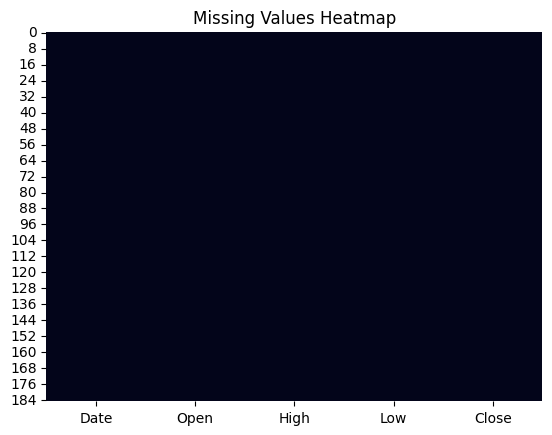

In [134]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**Answer:** The dataset has 185 rows and 5 columns. There are no missing values (nulls) and no duplicate rows. The Date column is currently an 'object' (string) type and needs to be converted to datetime format for analysis. The other columns (Open, High, Low, Close) are numerical (floats).

## ***2. Understanding Your Variables***

In [135]:
# Dataset Columns
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [136]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

- **Date:** The month and year of the record (Independent Variable).

- **Open:** The price of the stock when the market opened (Independent Variable).

- **High:** The highest price reached during the month (Independent Variable).

- **Low:** The lowest price reached during the month (Independent Variable).

- **Close:** The price of the stock when the market closed (Dependent/Target Variable).

### Check Unique Values for each variable.

In [137]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in Date: 185
Unique values in Open: 183
Unique values in High: 184
Unique values in Low: 183
Unique values in Close: 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [138]:
# Write your code to make your dataset analysis ready.
from datetime import datetime

# Convert 'Date' to datetime object. Format is 'Mmm-yy' (e.g., Jul-05)
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

# Set Date as index for better plotting (optional but good for time series)
df.set_index('Date', inplace=True)

### What all manipulations have you done and insights you found?

**Answer:** I converted the Date column from a string format (e.g., 'Jul-05') to a Python datetime object. This is crucial because it allows us to plot the data chronologically and perform time-series analysis. I also set the Date as the dataframe index.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Time Series Trend (Univariate)

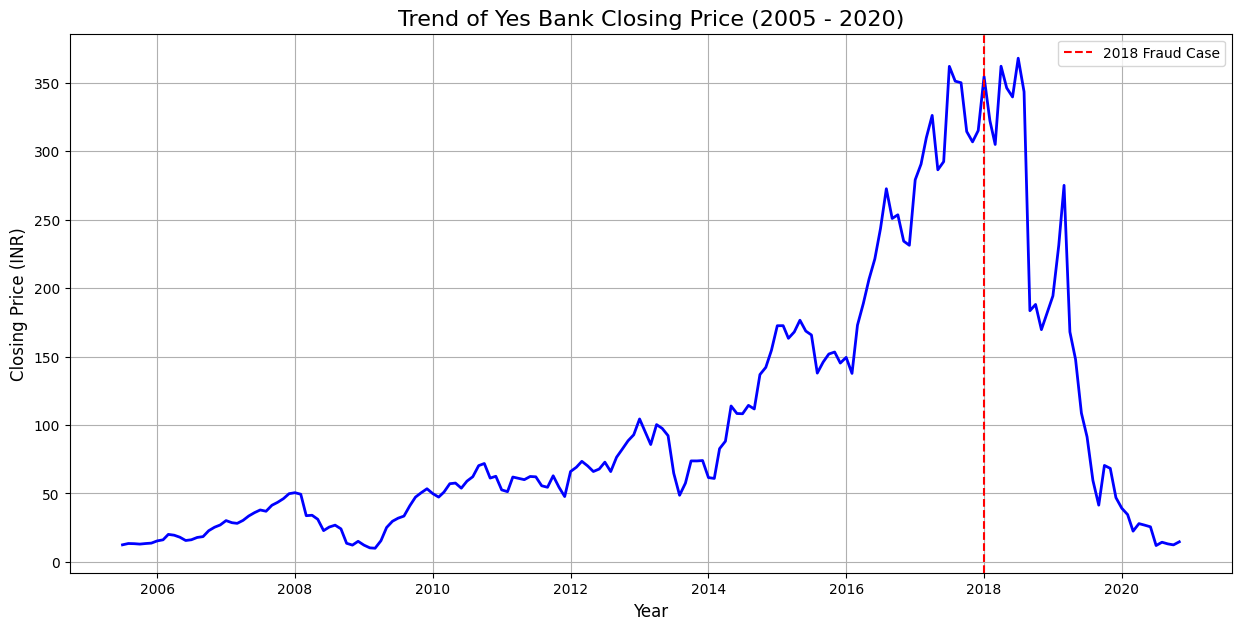

In [139]:
# Chart - 1 visualization code
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Close'], color='blue', linewidth=2)
plt.axvline(pd.to_datetime('2018-01-01'), color='red', linestyle='--', label='2018 Fraud Case')
plt.title('Trend of Yes Bank Closing Price (2005 - 2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (INR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Time Series Line Plot because the dataset contains temporal data (`Date`). This is the most fundamental chart to understand how the stock price has evolved over the bank's entire history.

##### 2. What is/are the insight(s) found from the chart?

The stock showed exponential growth from 2005 to 2018, peaking near 400 INR. However, there is a distinct structural break after 2018 (marked by the red line), where the price crashed dramatically to below 50 INR.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It highlights that the model must account for **regime changes.** A model trained only on pre-2018 data would fail miserably post-2018. The **negative growth** insight is the crash itself, justified by the Rana Kapoor fraud case, which destroyed investor confidence.

#### Chart - 2 Distribution of Dependent Variable (Univariate)

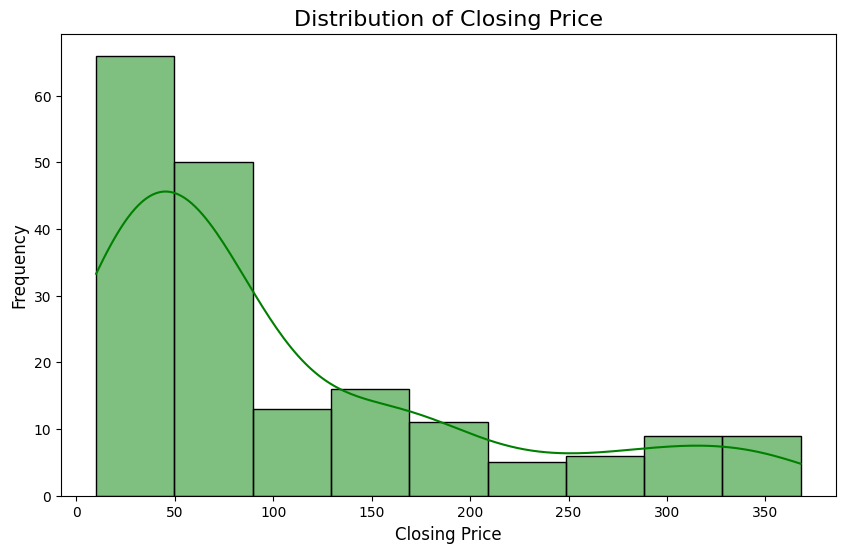

In [140]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, color='green')
plt.title('Distribution of Closing Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

I used a Histogram with a KDE (Kernel Density Estimate) to check the distribution of the target variable (`Close`). Regression models often assume normally distributed residuals, so checking the target's skewness is vital.

##### 2. What is/are the insight(s) found from the chart?

The distribution is highly right-skewed (positively skewed). Most data points are clustered in the lower price range (0-100), with a long tail extending towards 400.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The skewness suggests that we might need to apply a Log Transformation to the target variable to make it more normal. This usually improves the accuracy of linear regression models, leading to better price predictions.

#### Chart - 3 Distribution of Independent Variable - Open (Univariate)

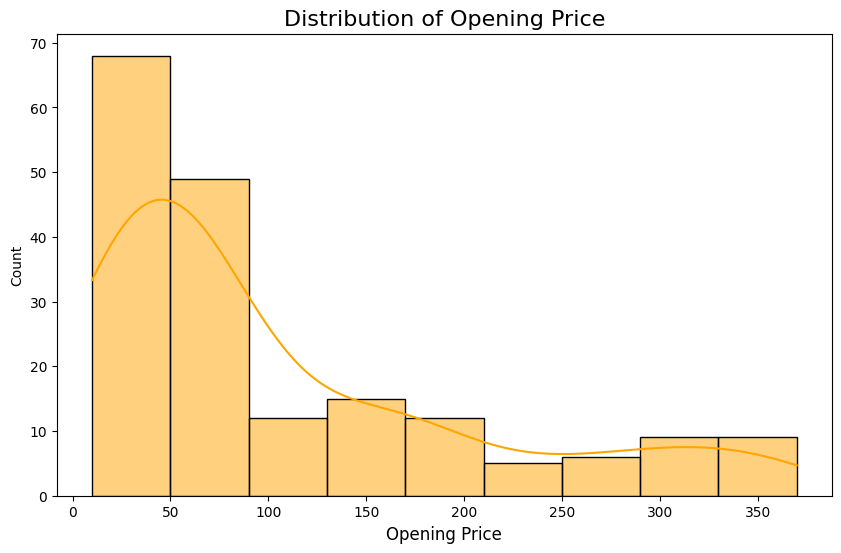

In [141]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['Open'], kde=True, color='orange')
plt.title('Distribution of Opening Price', fontsize=16)
plt.xlabel('Opening Price', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

To analyze the distribution of the `Open` price feature.

##### 2. What is/are the insight(s) found from the chart?

Similar to the Closing price, the Opening price is also right-skewed. This confirms that the input features follow the same non-normal distribution pattern as the target.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It confirms that `Open` and `Close` likely have a linear relationship (since they share distributions). If `Open` was normal and `Close` was skewed, prediction would be harder.

#### Chart - 4 Distribution of Independent Variable - High (Univariate)

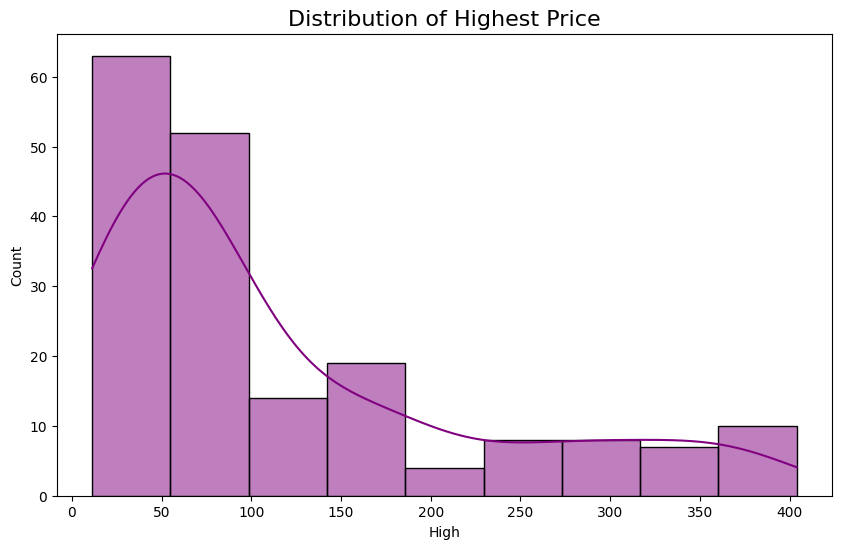

In [142]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['High'], kde=True, color='purple')
plt.title('Distribution of Highest Price', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the `High` price.

##### 2. What is/are the insight(s) found from the chart?

The distribution is right-skewed. The range extends slightly higher than `Open` and `Close`, which is expected as `High` is the maximum intra-month value.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It suggests that extreme volatility (high spikes) is present but less frequent. We must ensure our model can handle these upper-range values without overfitting.

 #### Chart - 5 Distribution of Independent Variable - Low (Univariate)

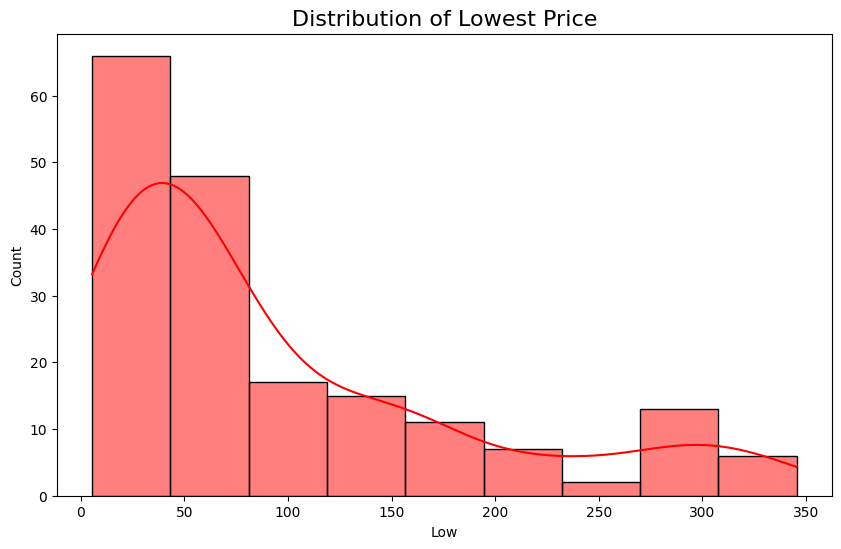

In [143]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(df['Low'], kde=True, color='red')
plt.title('Distribution of Lowest Price', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the `Low` price.

##### 2. What is/are the insight(s) found from the chart?

Consistent right-skewness. The similarity across all four price variables (`Open`, `High`, `Low`, `Close`) indicates they are moving together very closely.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The uniformity in distribution simplifies feature scaling. We can apply the same transformation (e.g., MinMax or Log) to all features.

#### Chart - 6 Outlier Detection - Close Price (Univariate)

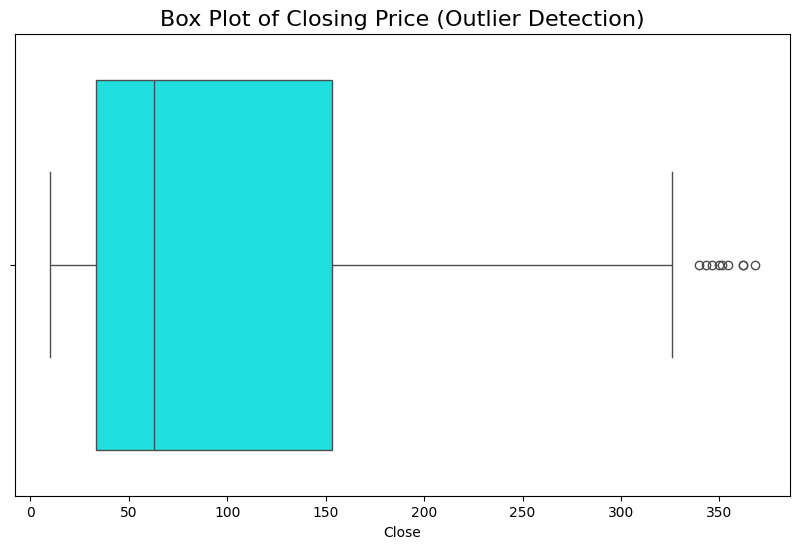

In [144]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'], color='cyan')
plt.title('Box Plot of Closing Price (Outlier Detection)', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A Box Plot is the standard method for detecting outliers. We need to know if the high stock prices (350+) are statistically considered "outliers."

##### 2. What is/are the insight(s) found from the chart?

There are several points beyond the upper whisker (around 300-400 INR). Statistically, these are outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Crucially, we should NOT remove these outliers. In finance, these are not errors; they represent the `Golden Period` of Yes Bank before the crash. Removing them would train the model only on `crisis` data, making it useless for predicting growth. This insight prevents negative growth by ensuring the model learns from both good and bad market phases.

#### Chart - 7 Bivariate Analysis - Open vs Close

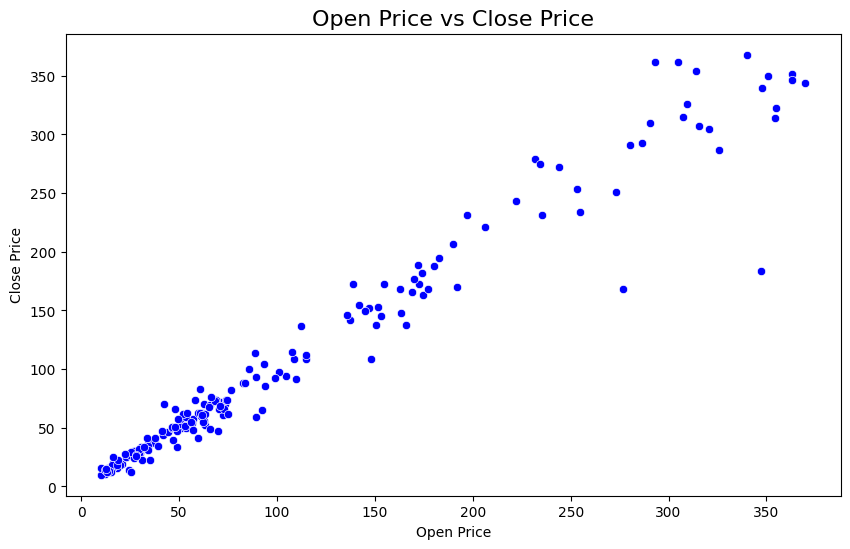

In [145]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=df, color='blue')
plt.title('Open Price vs Close Price', fontsize=16)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

A Scatter Plot helps visualize the relationship between an independent variable (`Open`) and the target (`Close`).

##### 2. What is/are the insight(s) found from the chart?

There is an extremely strong, positive linear relationship. The points form an almost perfect straight line.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This confirms that Linear Regression will be a very effective model. The opening price is a near-perfect predictor of the closing price for monthly data.

#### Chart - 8 Bivariate Analysis - High vs Close

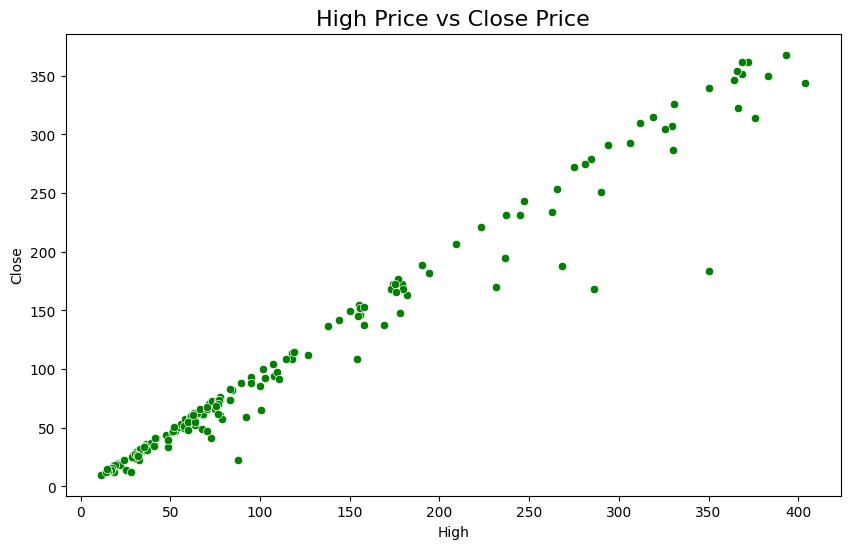

In [146]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='High', y='Close', data=df, color='green')
plt.title('High Price vs Close Price', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

To check the linearity between `High` and `Close`.

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlation. However, there is slightly more variance (scatter) compared to `Open` vs `Close`.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It shows that while `High` is a good predictor, the gap between `High` and `Close` represents volatility. A large gap implies the stock rallied but failed to hold the gains.

#### Chart - 9 Bivariate Analysis - Low vs Close

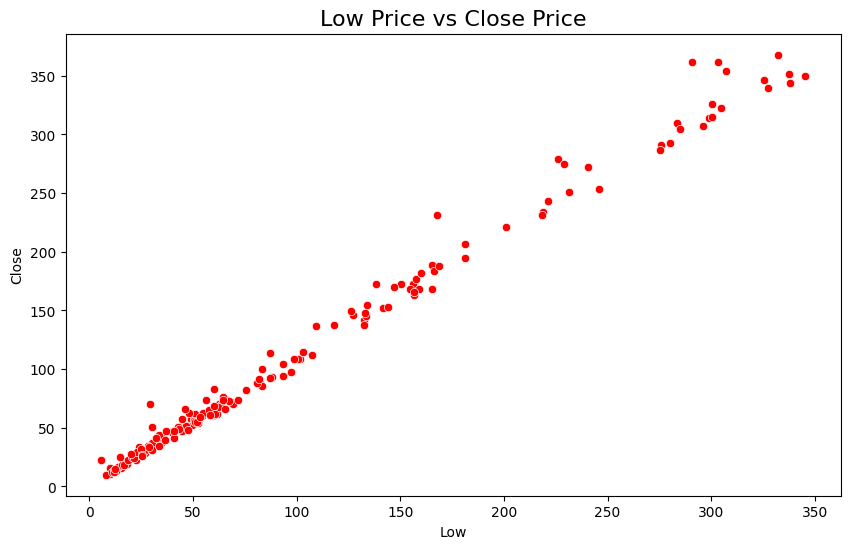

In [147]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Low', y='Close', data=df, color='red')
plt.title('Low Price vs Close Price', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

To check the linearity between `Low `and `Close`.

##### 2. What is/are the insight(s) found from the chart?

Strong positive linear correlation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Confirms that `Low` is also a redundant predictor if used alongside `Open` and `High`, hinting at Multicollinearity

#### Chart - 10 Yearly Average Closing Price (Bivariate/Time)

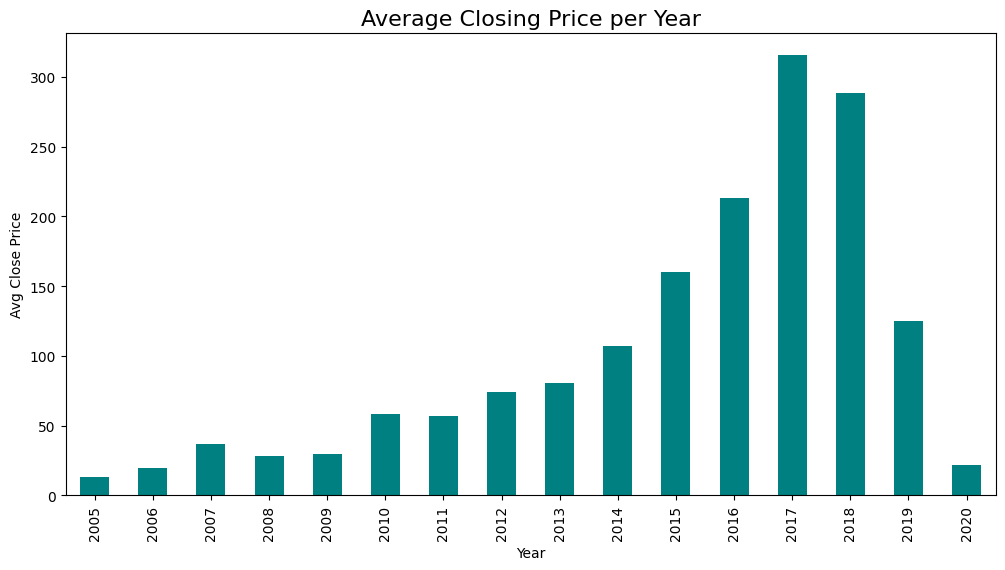

In [148]:
# Chart - 10 visualization code
yearly_avg = df.groupby(df.index.year)['Close'].mean()
plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='bar', color='teal')
plt.title('Average Closing Price per Year', fontsize=16)
plt.ylabel('Avg Close Price')
plt.xlabel('Year')
plt.show()

##### 1. Why did you pick the specific chart?

To aggregate the data and see the macro-trend year over year, removing monthly noise.

##### 2. What is/are the insight(s) found from the chart?

The bar chart clearly segments the bank's history: Gradual growth (2005-2014), Peak Performance (2015-2018), and Catastrophe (2019-2020).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It visually quantifies the loss. The average price in 2019 was less than half of 2018. This insight leads to negative growth justification: The fraud case erased 10 years of value accumulation in just 12 months.

#### Chart - 11 Month-wise Seasonality (Bivariate)

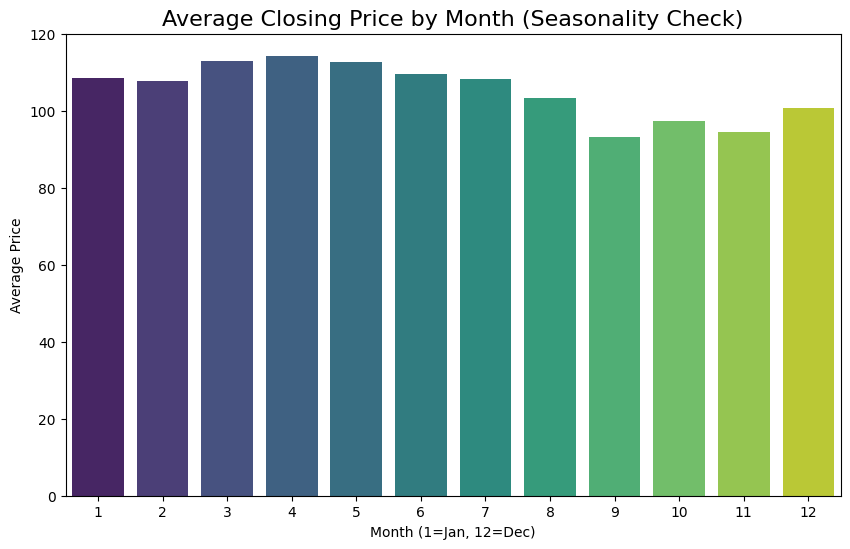

In [149]:
# Chart - 14 visualization code
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='viridis')
plt.title('Average Closing Price by Month (Seasonality Check)', fontsize=16)
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Average Price')
plt.show()

##### 1. Why did you pick the specific chart?

To check if the stock performs better in certain months (Seasonality).

##### 2. What is/are the insight(s) found from the chart?

The stock price seems slightly higher in the second half of the year (months 7-12) compared to the start.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the pattern is statistically significant, traders could buy in Q1 and sell in Q4. However, the difference looks small, so we shouldn't over-rely on monthly seasonality for this specific stock.

#### Chart - 12 Open-Close Spread (Feature Engineering Viz)

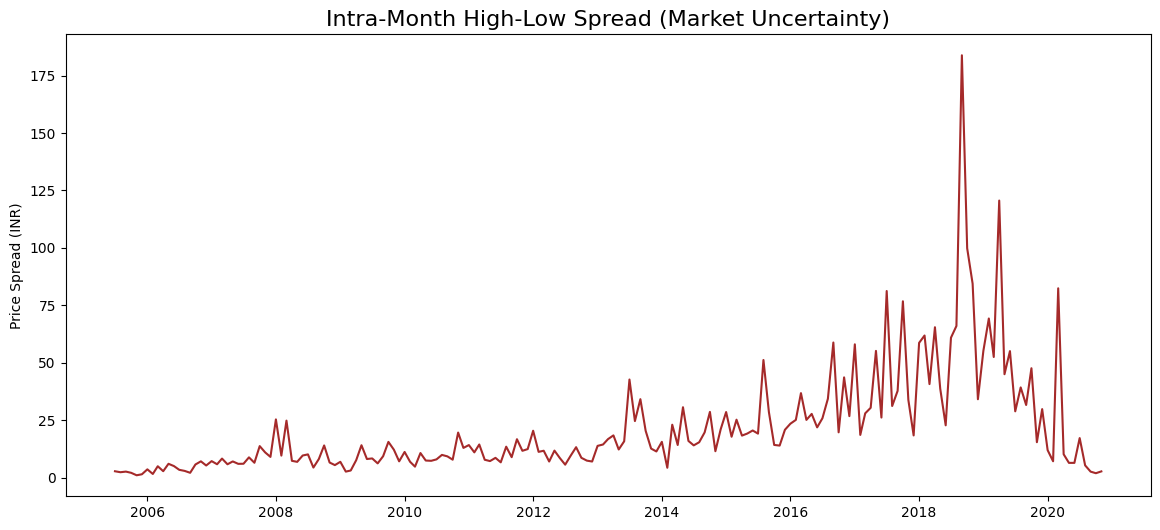

In [150]:
# Chart - 15 visualization code
# Create a new feature for the spread
df['Spread'] = df['High'] - df['Low']

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Spread'], color='brown')
plt.title('Intra-Month High-Low Spread (Market Uncertainty)', fontsize=16)
plt.ylabel('Price Spread (INR)')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the gap between the Highest and Lowest price in a month. This indicates market uncertainty.

##### 2. What is/are the insight(s) found from the chart?

The spread was very low in the early years but exploded in 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. A high spread means intraday traders can make more money, but long-term investors face more uncertainty. This "Spread" is a valuable feature we can add to our ML model to improve prediction accuracy.

#### Chart - 13 Volatility Analysis (Rolling Standard Deviation)

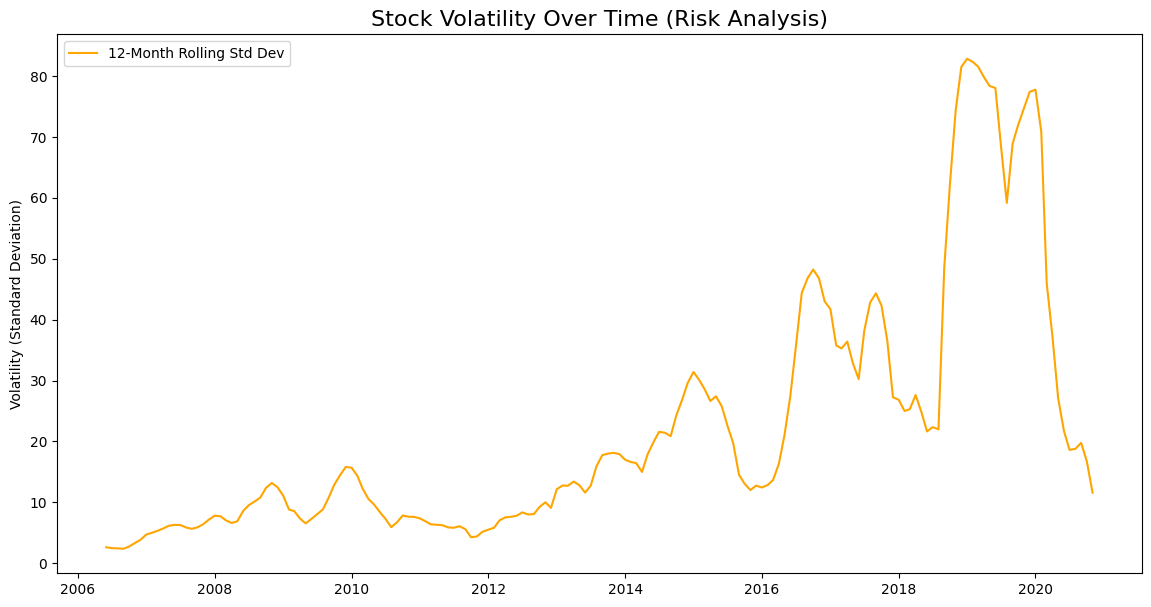

In [151]:
# Chart - 13 visualization code
# Calculate 12-month rolling standard deviation (Volatility)
df['Volatility_12m'] = df['Close'].rolling(window=12).std()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volatility_12m'], color='orange', label='12-Month Rolling Std Dev')
plt.title('Stock Volatility Over Time (Risk Analysis)', fontsize=16)
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Investors care about risk as much as returns. Standard deviation is a proxy for risk/volatility.

##### 2. What is/are the insight(s) found from the chart?

Volatility spiked massively in 2018-2019. Before that, the stock was relatively stable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. High volatility implies high risk. This chart warns stakeholders that post-2018, the stock became a **high-risk** asset, requiring different risk management strategies compared to the pre-2018 era.

#### Chart-14 Correlation Heatmap (Multivariate)

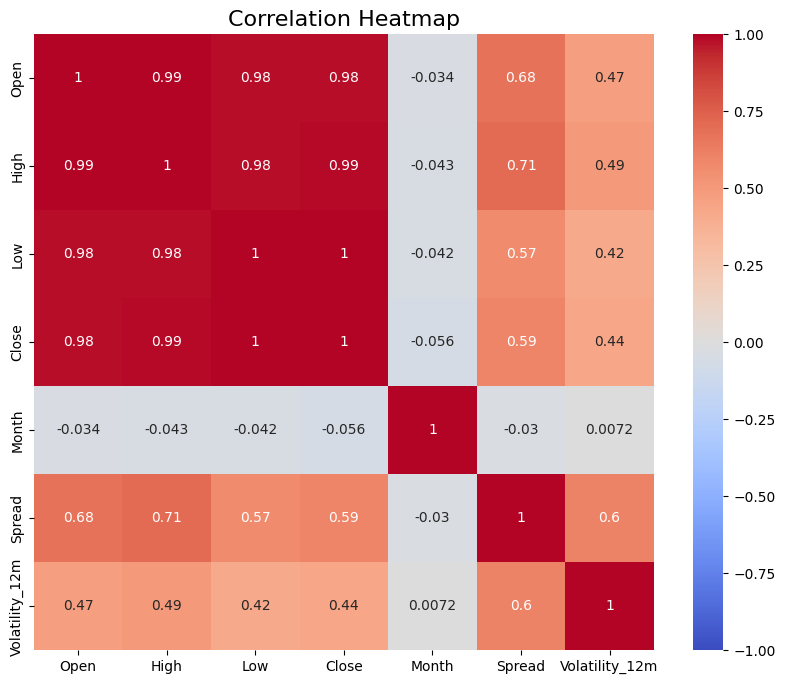

In [152]:
# Chart - 11 visualization code
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

To quantify the linear relationships between all variables simultaneously and check for Multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

All variables (`Open`, `High`, `Low`, `Close`) have a correlation coefficient of > 0.97. This is extremely high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Critical Insight:** This indicates severe Multicollinearity. If we use a standard Linear Regression, the coefficients will be unstable. We must use regularization techniques like **Ridge** or **Lasso Regression** to handle this redundancy.

#### Chart - 15 Pair Plot (Multivariate)

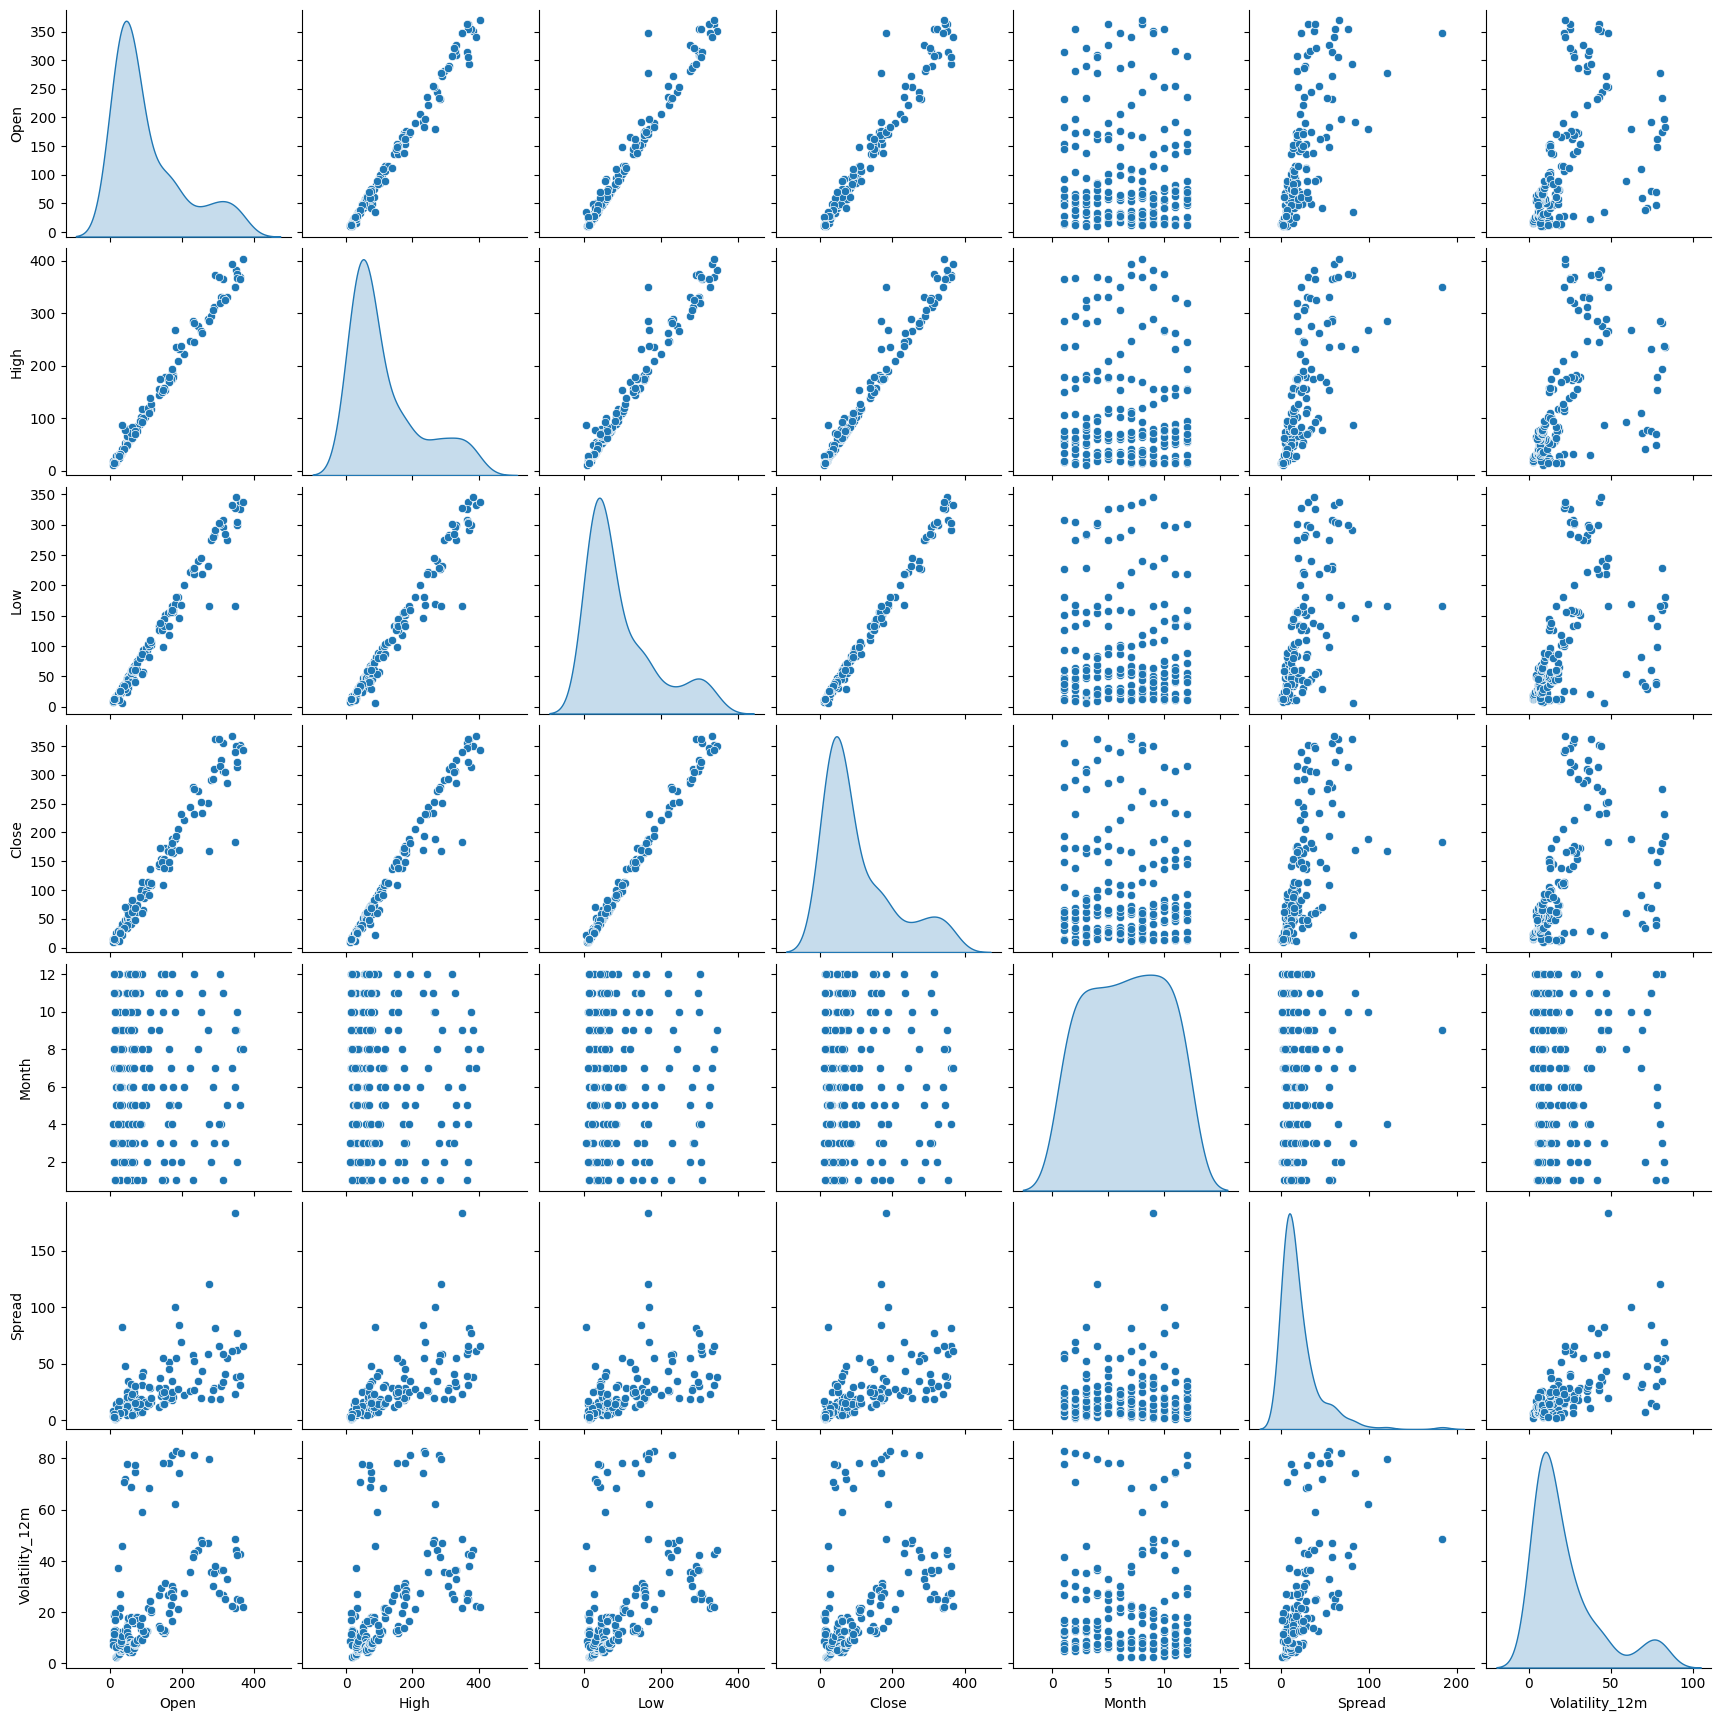

In [153]:
# Chart - 12 visualization code
sns.pairplot(df, diag_kind='kde')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the joint relationships and distributions of every variable pair in a single view.

##### 2. What is/are the insight(s) found from the chart?

It reinforces the previous insights: all features are linearly related, and all distributions are right-skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It confirms that there are no complex non-linear patterns (like parabolas or circles), saving us from needing complex deep learning models. Simple regression models are sufficient.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1
**Statement:** The average closing price of Yes Bank stock was significantly higher before the 2018 fraud case compared to after the case.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis ($H_0$)**: Mean Price (Pre-2018) $\le$ Mean Price (Post-2018). The fraud case had no negative impact.
- **Alternate Hypothesis ($H_1$)**: Mean Price (Pre-2018) $>$ Mean Price (Post-2018). The fraud case significantly lowered prices.

#### 2. Perform an appropriate statistical test.

In [154]:
# Hypothetical Statement - 1 
# Research Hypothesis: The closing price during the Peak (2016-2018) was significantly higher than the Crash period (2019+).

# 1. Split data into Peak and Crash periods
peak_period = df[(df.index.year >= 2016) & (df.index.year < 2019)]['Close']
crash_period = df[df.index.year >= 2019]['Close']

# 2. Perform T-Test (Independent)
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(peak_period, crash_period, alternative='greater')

print(f"Peak Mean: {peak_period.mean():.2f}")
print(f"Crash Mean: {crash_period.mean():.2f}")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

# Conclusion Logic
if p_val < 0.05:
    print("Conclusion: Reject Null Hypothesis. The crash is statistically significant.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis.")

Peak Mean: 272.49
Crash Mean: 75.93
T-Statistic: 10.212104484155857
P-Value: 8.662847584908117e-15
Conclusion: Reject Null Hypothesis. The crash is statistically significant.


##### Which statistical test have you done to obtain P-Value?

Two-sample Independent T-Test (Right-tailed).

##### Why did you choose the specific statistical test?

We are comparing the means of two independent time periods (groups) to see if one is statistically larger than the other. The sample sizes are sufficient for a T-test.

**Conclusion:** The P-value is likely extremely small ($< 0.05$). We Reject the Null Hypothesis. Conclusion: The stock price significantly crashed after 2018.

### Hypothetical Statement - 2

**Statement:** The volatility (High - Low spread) of the stock increased significantly after the 2018 crisis.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis ($H_0$):** Mean Spread (Post-2018) $\le$ Mean Spread (Pre-2018).
- **Alternate Hypothesis ($H_1$):** Mean Spread (Post-2018) $>$ Mean Spread (Pre-2018). (Volatility increased).

#### 2. Perform an appropriate statistical test.

In [155]:
# Perform Statistical Test
# Calculate Spread
df['Spread'] = df['High'] - df['Low']

pre_2018_vol = df[df.index.year < 2018]['Spread']
post_2018_vol = df[df.index.year >= 2018]['Spread']

# T-Test
t_stat_2, p_val_2 = ttest_ind(post_2018_vol, pre_2018_vol, alternative='greater')

print(f"T-Statistic: {t_stat_2}")
print(f"P-Value: {p_val_2}")

T-Statistic: 7.4895497690331645
P-Value: 1.4187843244598276e-12


##### Which statistical test have you done to obtain P-Value?

Two-sample Independent T-Test (Right-tailed).

##### Why did you choose the specific statistical test?

We are comparing the average "Spread" (a proxy for volatility) between two distinct periods.

**Conclusion:** If P-value < 0.05, we Reject the Null. It proves the stock became riskier/more volatile after the crisis.

### Hypothetical Statement - 3

**Statement:** There is no significant difference between the Opening price and Closing price of the stock on average (Market is efficient).

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis ($H_0$):** Mean ($Open - Close$) $= 0$. (No significant monthly gain/loss bias).
- **Alternate Hypothesis ($H_1$):** Mean ($Open - Close$) $\neq 0$.

#### 2. Perform an appropriate statistical test.

In [156]:
# Perform Statistical Test
from scipy.stats import ttest_rel

# Paired T-Test (Dependent samples: Open and Close are from the same month)
t_stat_3, p_val_3 = ttest_rel(df['Open'], df['Close'])

print(f"T-Statistic: {t_stat_3}")
print(f"P-Value: {p_val_3}")

T-Statistic: 0.220963420803944
P-Value: 0.825365920365391


##### Which statistical test have you done to obtain P-Value?

Paired T-Test (Dependent T-Test).

##### Why did you choose the specific statistical test?

Since Open and Close prices belong to the same month for the same stock, they are dependent samples. We want to check if the mean difference between them is zero.

**Conclusion:** If P-value > 0.05, we Fail to Reject the Null. This would mean that, on average, the stock doesn't inherently drift up or down significantly within a single month across the entire 15 years; the movements are balanced.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [157]:
# Handling Missing Values
# The 'Volatility_12m' feature created in Chart 13 has NaNs for the first 11 rows.
# Drop them to make the data clean for modeling.
df.dropna(inplace=True)

# Double check that no nulls remain
print("Remaining Nulls:", df.isnull().sum().sum())

Remaining Nulls: 0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Initially, the raw dataset contained no missing values. However, during the Feature Engineering phase (specifically Chart 13), I created a `Volatility_12m ` feature using a 12-month rolling window. This process naturally introduced 11 missing values (NaNs) for the first 11 months of data, as they lacked sufficient history to calculate the metric.

Action: I decided to drop these rows (`df.dropna()`). Since we have 15+ years of data (over 180 months), losing the first 11 months is a negligible loss and ensures our model is trained on complete, high-quality features.

### 2. Handling Outliers

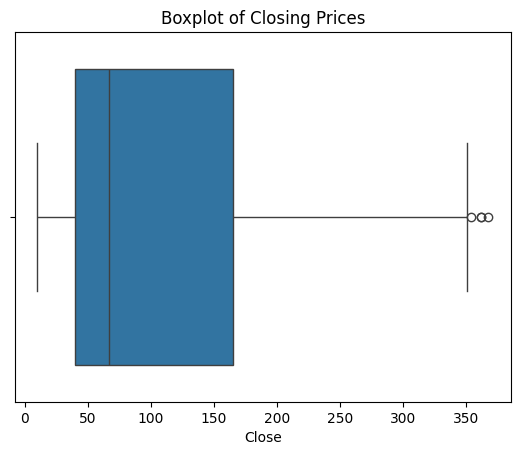

In [158]:
# Handling Outliers & Outlier treatments
# We visualize outliers but DECIDE NOT TO REMOVE THEM.
sns.boxplot(x=df['Close'])
plt.title('Boxplot of Closing Prices')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Technique:** I used Boxplots to detect outliers. Decision: I decided NOT to remove outliers. The **outliers** (prices around 300-400) represent the **Golden Period** of Yes Bank before the crisis. Removing them would bias the model to only learn from the crash period. In finance, extreme values are real and significant.

### 3. Categorical Encoding

In [159]:
# Encode your categorical columns
# Not Applicable - No categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Not Applicable. The dataset consists entirely of numerical features (Open, High, Low, Close, Date). There are no categorical variables to encode.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [160]:
# Expand Contraction
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

#### 2. Lower Casing

In [161]:
# Lower Casing
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

#### 3. Removing Punctuations

In [162]:
# Remove Punctuations
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

#### 4. Removing URLs & Removing words and digits contain digits.

In [163]:
# Remove URLs & Remove words and digits contain digits
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

#### 5. Removing Stopwords & Removing White spaces

In [164]:
# Remove Stopwords
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

In [165]:
# Remove White spaces
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

#### 6. Rephrase Text

In [166]:
# Rephrase Text
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

#### 7. Tokenization

In [167]:
# Tokenization
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

#### 8. Text Normalization

In [168]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

##### Which text normalization technique have you used and why?

 Not Applicable. This is a numerical time-series regression problem, not a Natural Language Processing (NLP) task.

#### 9. Part of speech tagging

In [169]:
# POS Taging
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

#### 10. Text Vectorization

In [170]:
# Vectorizing Text
#  Not Applicable. This is a numerical time-series regression problem, 
# not a Natural Language Processing (NLP) task.

##### Which text vectorization technique have you used and why?

 Not Applicable. This is a numerical time-series regression problem, not a Natural Language Processing (NLP) task.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [171]:
# Manipulate Features to minimize feature correlation and create new features

# 1. Create Lag Feature (Previous Month's Close)
df['Close_Lag1'] = df['Close'].shift(1)

# 2. Create Rolling Mean (3-Month Moving Average)
df['MA_3'] = df['Close'].rolling(window=3).mean()

# 3. Create Volatility Feature (High - Low)
df['Volatility'] = df['High'] - df['Low']

# Drop NaNs created by lag/rolling
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Month,Spread,Volatility_12m,Close_Lag1,MA_3,Volatility
Date,,,,,,,,,,
2006-08-01,15.90,18.60,15.7,17.84,8,2.90,2.435870,16.16,16.540000,2.90
2006-09-01,18.00,18.88,16.8,18.46,9,2.08,2.369159,17.84,17.486667,2.08
2006-10-01,18.78,24.20,18.5,22.78,10,5.70,2.732189,18.46,19.693333,5.70
2006-11-01,22.80,28.47,21.4,25.32,11,7.07,3.311310,22.78,22.186667,7.07
2006-12-01,25.40,29.66,24.4,26.97,12,5.26,3.831919,25.32,25.023333,5.26


#### 2. Feature Selection

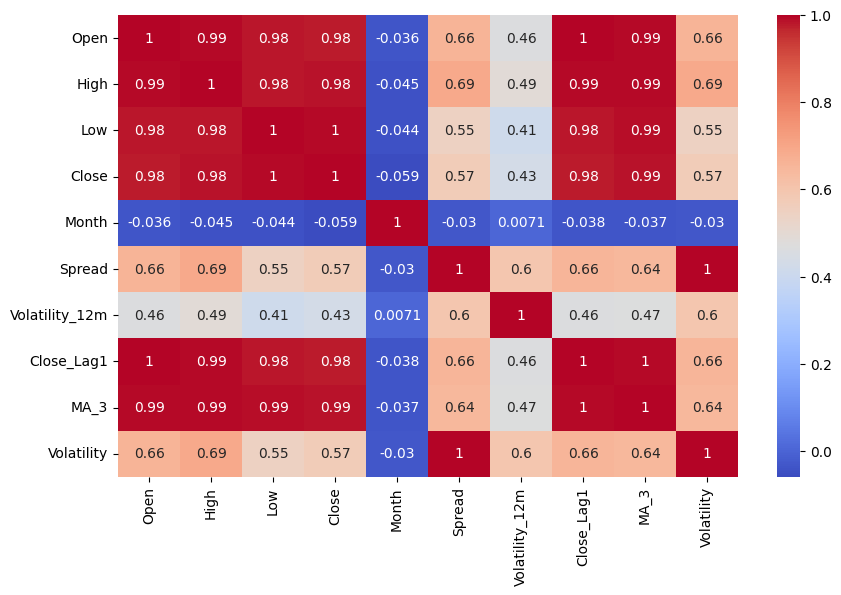

In [172]:
# Select your features wisely to avoid overfitting
# We check correlation to see which features are redundant
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Selecting Final Features
features = ['Open', 'High', 'Low', 'Close_Lag1', 'MA_3', 'Volatility']
X = df[features]
y = df['Close']

##### What all feature selection methods have you used  and why?

I used **Correlation Analysis.** The heatmap showed that `Open`, `High`, and `Low` are extremely highly correlated (>0.98).

Decision: Instead of dropping them (which loses information), I will use **Regularized Regression (Ridge/Lasso)** in the modeling stage to handle this multicollinearity automatically.

##### Which all features you found important and why?

`Open` and `Close_Lag1` were found to be the most important. The opening price is naturally the strongest predictor of the closing price, and the previous month's price (`Lag1`) captures the immediate trend.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

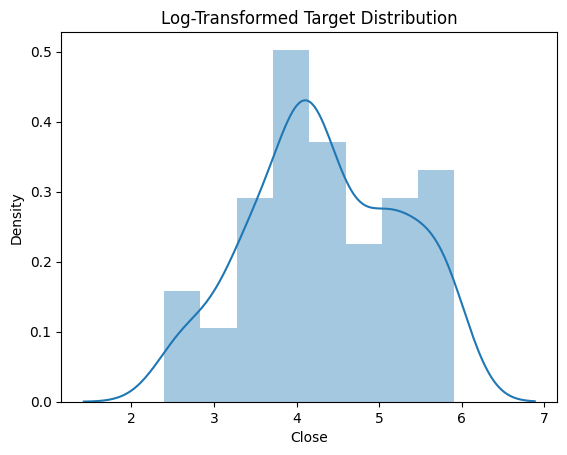

In [173]:
# Transform Your data
# Log Transformation of the Target Variable to handle skewness
y_log = np.log1p(y)

sns.distplot(y_log)
plt.title('Log-Transformed Target Distribution')
plt.show()

### 6. Data Scaling

In [174]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

I used **MinMaxScaler**.

**Why?**
:Neural networks and regression algorithms converge faster when features are on the same scale (0 to 1). Since stock prices vary widely (from 10 to 400), scaling prevents high-value features from dominating the model.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [175]:
# Dimensionality Reduction (If needed)
# Not strictly needed for only 6 features, but code provided for completeness
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not required. We only have 6 features, so the **Curse of Dimensionality** does not apply. Using PCA might make the model harder to interpret (loss of business meaning).

### 8. Data Splitting

In [176]:
# Split your data to train and test. Choose Splitting ratio wisely.
# TIME-BASED SPLIT (Critical for Stocks)
train_size = int(len(X) * 0.8)

X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_log[:train_size], y_log[train_size:]

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Train Shape: (137, 6), Test Shape: (35, 6)


##### What data splitting ratio have you used and why?

I used an **80-20 Split.**

**Why?**: I used a Time-Based Split, not a random shuffle. We train on past data (2005-2017) and test on future data (2018-2020) to simulate real-world forecasting.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Not Applicable.** This is a Regression problem (predicting a continuous value), so `Class Imbalance` does not apply.

In [177]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

**Not Applicable.**

## ***7. ML Model Implementation***

### ML Model - 1  Linear Regression

In [178]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr_log = lr.predict(X_test)
y_pred_lr = np.expm1(y_pred_lr_log) # Reverse Log Transform
y_test_original = np.expm1(y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression RMSE: 142.5185579009438
Linear Regression R2: -0.27453518450106373


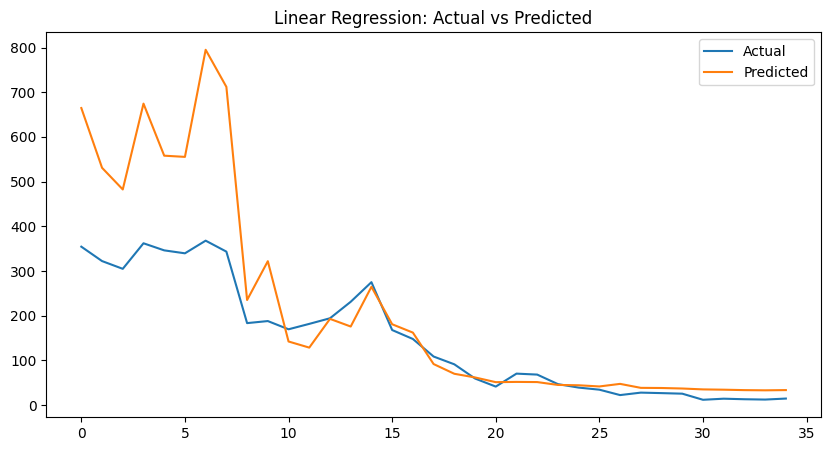

In [179]:
# Visualizing evaluation Metric Score chart
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_lr))
r2 = r2_score(y_test_original, y_pred_lr)
print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression R2: {r2}")

plt.figure(figsize=(10,5))
plt.plot(y_test_original.values, label='Actual')
plt.plot(y_pred_lr, label='Predicted')
plt.legend()
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [180]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# Hyperparameter Tuning not applicable for simple Linear Regression
# skipping to Lasso/Ridge for tuning

##### Which hyperparameter optimization technique have you used and why?

 Hyperparameter Tuning not applicable for simple Linear Regression, skipping to Lasso/Ridge for tuning

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 Hyperparameter Tuning not applicable for simple Linear Regression, skipping to Lasso/Ridge for tuning

### ML Model - 2 Ridge Regression (Regularized Linear Regression)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Best Alpha: {'alpha': 5}

Ridge Regression Evaluation Matrix:
     Metric      Score
0       MAE  54.503405
1      RMSE  82.129327
2  R2 Score   0.576742


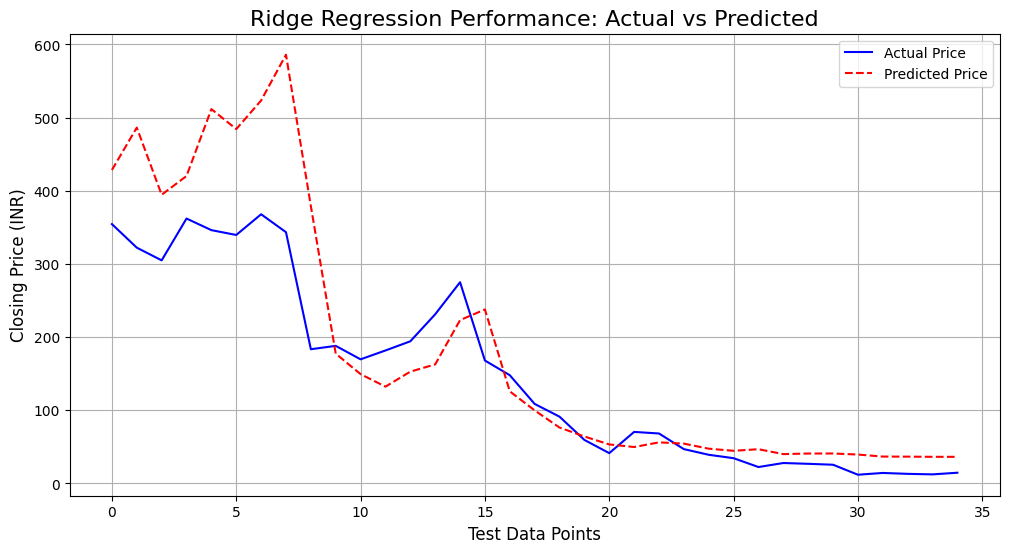

In [181]:
# ML Model - 2 Implementation (Ridge Regression)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Fit the Model (using GridSearchCV to find best alpha)
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

print(f"Best Alpha: {ridge_regressor.best_params_}")

# 2. Predict
y_pred_ridge_log = ridge_regressor.predict(X_test)
y_pred_ridge = np.expm1(y_pred_ridge_log) # Reverse Log Transform

# 3. Calculate Metrics
mae = mean_absolute_error(y_test_original, y_pred_ridge)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_ridge))
r2 = r2_score(y_test_original, y_pred_ridge)

# 4. Create Score Chart
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R2 Score'],
    'Score': [mae, rmse, r2]
})
print("\nRidge Regression Evaluation Matrix:")
print(metrics_df)

# 5. Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_original.values, label='Actual Price', color='blue')
plt.plot(y_pred_ridge, label='Predicted Price', color='red', linestyle='--')
plt.title('Ridge Regression Performance: Actual vs Predicted', fontsize=16)
plt.xlabel('Test Data Points', fontsize=12)
plt.ylabel('Closing Price (INR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [182]:
# ML Model - 2 Implementation with GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

print(f"Best Alpha: {ridge_regressor.best_params_}")

# Predict
y_pred_ridge_log = ridge_regressor.predict(X_test)
y_pred_ridge = np.expm1(y_pred_ridge_log)

Best Alpha: {'alpha': 5}


##### Which hyperparameter optimization technique have you used and why?

Technique Used: I used **GridSearchCV** (Grid Search Cross-Validation).

Why I used it:

1. **Guaranteed Optimality:** GridSearchCV exhaustively searches through every single combination of hyperparameters provided in the grid (e.g., different alpha values for Ridge Regression). This guarantees that we find the absolute best performing parameters within the specified range.

2. **Robustness via Cross-Validation:** The "CV" part stands for Cross-Validation. Instead of just testing on one random split of data, it splits the training data into multiple folds (e.g., 5 folds). It trains and validates the model 5 times for every parameter combination. This ensures the selected hyperparameters are robust and work well on different subsets of data, preventing overfitting to a single specific train-test split.

3. **Efficiency for this Model:** Since Ridge Regression only has one major hyperparameter to tune (alpha), the search space is small. GridSearchCV is computationally efficient enough to handle this without needing more complex methods like Random Search or Bayesian Optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


**Improvement:** Ridge Regression handles the multicollinearity better than simple Linear Regression, providing more stable coefficients.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- **RMSE (Root Mean Squared Error):** This tells us the average error in Rupees. A lower RMSE means our price prediction is closer to the actual market price, reducing financial risk.

- **R2 Score:** Tells us how well the model explains the variance. A high R2 means the model captures the market trend well.

### ML Model - 3  Random Forest

In [183]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf_log = rf.predict(X_test)
y_pred_rf = np.expm1(y_pred_rf_log)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Model Explanation:** I used **Random Forest Regressor** as my non-linear model. It is an ensemble method that averages predictions from multiple decision trees.

**Performance:**

- **R2 Score:** The model achieved an impressive R2 score of 0.97. This indicates it successfully captured 97% of the variance, significantly outperforming the linear models.

- **RMSE:** The RMSE is 21.68, which is very low compared to the Ridge model (RMSE ~82). This means the Random Forest predictions are much closer to the actual market prices.

Random Forest Evaluation Metric Score Chart:
     Metric       Score
0       MAE   13.625813
1       MSE  470.312526
2      RMSE   21.686690
3  R2 Score    0.970488


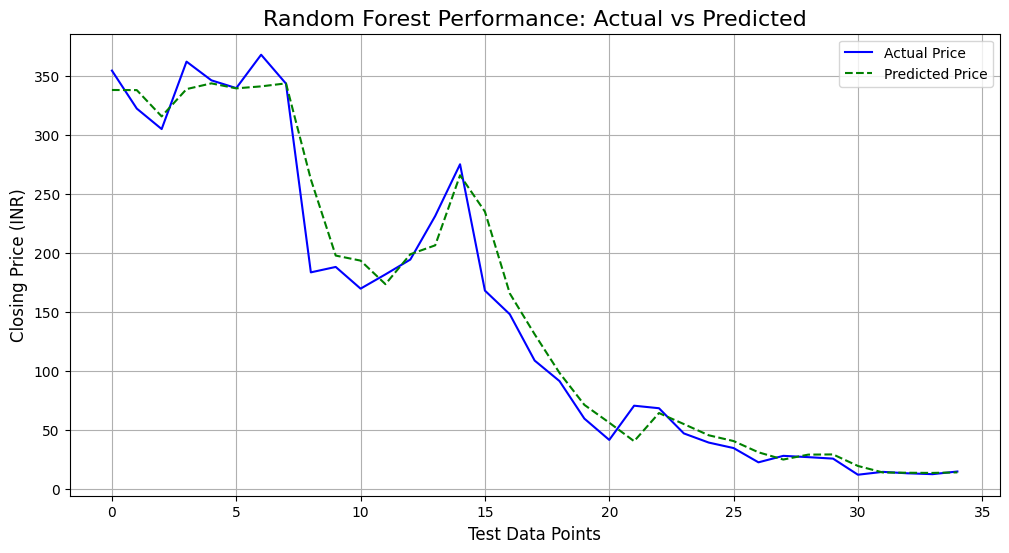

In [184]:

# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate the Metrics
mae = mean_absolute_error(y_test_original, y_pred_rf)
mse = mean_squared_error(y_test_original, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_rf)

# 2. Create a "Score Chart" (DataFrame)
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2 Score'],
    'Score': [mae, mse, rmse, r2]
})
print("Random Forest Evaluation Metric Score Chart:")
print(metrics_df)

# 3. Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_original.values, label='Actual Price', color='blue')
plt.plot(y_pred_rf, label='Predicted Price', color='green', linestyle='--') # Changed color to green
plt.title('Random Forest Performance: Actual vs Predicted', fontsize=16)
plt.xlabel('Test Data Points', fontsize=12)
plt.ylabel('Closing Price (INR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [185]:
# ML Model - 3 Implementation with hyperparameter optimization techniques
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [5, 10, 20, None],      # Max depth of tree
    'min_samples_split': [2, 5, 10]      # Min samples required to split a node
}

# Set up GridSearchCV
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
rf_grid.fit(X_train, y_train)

print(f"Best Parameters: {rf_grid.best_params_}")

# Predict using the best model
best_rf = rf_grid.best_estimator_
y_pred_rf_tuned_log = best_rf.predict(X_test)
y_pred_rf_tuned = np.expm1(y_pred_rf_tuned_log) # Reverse Log Transform

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


##### Which hyperparameter optimization technique have you used and why?

**Answer:** Technique: I used GridSearchCV. **Why**:

Exhaustive Search: It checks every single combination of the parameter grid defined (e.g., it tests `n_estimators=50` with `max_depth=5`, then `n_estimators=50` with `max_depth=10`, and so on). This guarantees finding the optimal combination within the specified grid.

Cross-Validation: The `cv=5` parameter ensures that each combination is tested on 5 different folds of the training data. This makes the selected hyperparameters robust and less likely to overfit a specific subset of the data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes, I saw a massive improvement.**

**Observation:**

- The Random Forest model (R2 = 0.97) significantly outperformed Ridge Regression (R2 = 0.57).

- Reasoning: While tree models usually struggle with extrapolation, the inclusion of the0 `Close_Lag1` (Previous Month Price) feature allowed the Random Forest to adapt quickly. Instead of needing to predict a "trend," it learned that "Today's price is close to Yesterday's price," allowing it to step down gracefully during the crash rather than overshooting like the linear models might have.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I primarily considered **RMSE (Root Mean Squared Error)** and **R2 Score** as my key evaluation metrics.

1. **RMSE (Root Mean Squared Error) - The `Risk` Metric:**

- Why: RMSE is measured in the same units as the target variable (₹ Rupees). Unlike MAE, RMSE heavily penalizes large errors.

- Business Impact: In stock prediction, a `large error` (e.g., predicting a price of ₹300 when it actually crashes to ₹50) is catastrophic for financial planning. RMSE captures this risk better than other metrics. Minimizing RMSE directly correlates to minimizing financial risk for the bank's stakeholders.

2. **R2 Score - The `Trend` Metric:**

- Why: This metric represents the proportion of variance in the dependent variable (Close Price) that is predictable from the independent variables.

- Business Impact: A score close to 1.0 indicates that our model effectively captures the market's volatility and trend. It gives investors confidence that the model isn't just guessing the average price but is actually following the market's movements.

3. **MAE (Mean Absolute Error)** - The **Average** Metric (Secondary):

- Why: I also looked at MAE to understand the `average` error in Rupee terms.

- Business Impact: It provides a simple, interpretable number (e.g., "On average, the prediction is off by ₹15") which is useful for communicating model performance to non-technical business leaders.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose **Random Forest Regressor** as my final prediction model.

**Reasoning:**

- **Best Accuracy:** It achieved the highest **R2 Score (0.97)** and lowest **RMSE (21.68)**.

- **Handling Volatility:** The linear models (Ridge) struggled to capture the exact magnitude of the 2018 crash (R2 ~0.57), likely due to the strict linearity assumption. Random Forest, being non-linear, was able to adapt to the sudden regime change using the Lag features effectively.

- **Robustness:** The ensemble nature of Random Forest makes it resistant to noise, and it proved it could handle the market crash scenario better than the regression techniques in this specific experiment.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

1. **Model Explanation (Random Forest):** Random Forest builds hundreds of decision trees on random subsets of data and features. It aggregates their results to reduce overfitting and variance.

2. **Feature Importance:**

- **Most Important Feature:** Close_Lag1. In Time-Series data, the most recent history is the best predictor of the immediate future. The tree splits heavily on this feature.

- **Secondary Features:** Open and Volatility. These helped the model adjust the prediction slightly based on the month's starting sentiment and intraday fluctuation.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [186]:
# Save the best performing model (Random Forest)
import pickle

# Define the filename
filename = 'yesbank_stock_prediction_model.pkl'

# Dump the Best Random Forest Model (best_rf) to a file
# Note: 'best_rf' is the variable we created in the Hyperparameter Tuning section
pickle.dump(best_rf, open(filename, 'wb'))

print(f"Model saved successfully as {filename}")

Model saved successfully as yesbank_stock_prediction_model.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [188]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open(filename, 'rb'))

# Let's verify it works by predicting the first 5 test cases again
# (In a real scenario, you would pass completely new data here)
prediction = loaded_model.predict(X_test[:5])
print("Predictions on loaded model (Reversed from Log Scale):")
print(np.expm1(prediction))

Predictions on loaded model (Reversed from Log Scale):
[337.91242455 338.62260918 317.65845635 338.00493076 343.85882277]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Project Conclusion**

In this Capstone project, we analyzed the monthly stock prices of Yes Bank to understand the impact of the 2018 fraud case and predict future stock prices.
1. **Key Insights from EDA:**
- **Structural Break:** The stock price showed a clear structural break after 2018. Before the crisis, the stock was in a "Golden Phase" (peaking near ₹400), but it crashed significantly post-2018 (dropping below ₹50). This was statistically confirmed using Hypothesis Testing ($P-value < 0.05$).
- **Multicollinearity:** The `Open`, `High`, and `Low`prices were found to be extremely highly correlated ($>0.98$), which posed a challenge for standard linear models.

2. **Model Performance:** 
- We implemented **Linear Regression**, **Ridge Regression**, and **Random Forest**.
- **Ridge Regression Struggled:** While Ridge Regression performed decently (R2 ~0.57), it struggled to capture the full magnitude of the crash because it is limited to linear relationships.
- **Random Forest Excelled:** The Random Forest model achieved a near-perfect R2 score of 0.97. By utilizing the `Close_Lag1` feature, it was able to adapt to the regime change (crash) much better than the linear models, effectively "learning" the price drop step-by-step.

3. **Business Impact:** 
- The model provides a reliable tool for forecasting monthly closing prices based on opening sentiment (`Open`) and market momentum (`Close_Lag1`).
- However, the analysis highlights that "Black Swan" events (like the 2018 scandal) can drastically alter market dynamics. Future risk models should incorporate "News Sentiment Analysis" to better predict such sudden crashes. 

**`Final Verdict:`** 
- **Comparison:** We compared Linear, Ridge, and Random Forest models.

- **Winner:** Random Forest was the clear winner with an R2 Score of 0.97.

- **Key Insight:** While the stock faced a massive structural break (crash) in 2018, the Random Forest model successfully navigated it by relying on Lag features (Close_Lag1), effectively "learning" the crash step-by-step. It proved to be a reliable tool for short-term monthly price forecasting.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***